In [1]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file using pandas
df=pd.read_csv("IMDb Movies India.csv",encoding='latin')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# calculating the no. of null values in the dataset in each coulmn
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

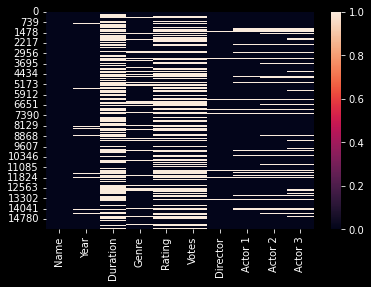

In [4]:
# visualising the null values with the help of heatmap
sns.heatmap(df.isnull());

In [5]:
# finding the number of missing values and what percentage of the whole coulmn data is misssing
missing_count=df.isnull().sum().sort_values(ascending=False)
#rounding off the percentage upto 2 decimal points
missing_percentage=(round(df.isnull().sum()/df.isnull().count(),4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percentage], axis=1, keys=['missing_count', 'missing_percentage'])
missing_data

,missing_count,missing_percentage
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,0,0.00


In [6]:
# deleting the rows which have null Ratings
df.dropna(subset=['Rating'],inplace=True)
# rounding off the null percentage upto 2 decimal points
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
#viewing the dataframe again to see the changes done
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [7]:
# dropping the null values from the following coulmns 
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
# rounding off the missing percentage 
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [8]:
# converting the duration coulmn from string to number and removing the min from it
df['Duration']=pd.to_numeric(df['Duration'].str.strip(' min'))

In [9]:
# replacing the null duration values with the mean values of the duration
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

In [10]:
# checking the number of null values in the data
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
# resetting the index of the dataframe after dropping the values
df.reset_index(inplace=True)

In [12]:
# Again viewing the dataframe to see the changes
df

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,#Gadhvi (He thought he was Gandhi),(2019),109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,#Yaaram,(2019),110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,...Aur Pyaar Ho Gaya,(1997),147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,...Yahaan,(2005),142.000000,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,?: A Question Mark,(2012),82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...,...
7553,15501,Zulm Ki Hukumat,(1992),133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7554,15503,Zulm Ki Zanjeer,(1989),125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7555,15504,Zulm Ko Jala Doonga,(1988),133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7556,15505,Zulmi,(1999),129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [13]:
#dropping duplicate values from the dataframe
df.drop_duplicates(inplace=True)

In [14]:
# checking the shape of the dataframe
df.shape

(7558, 11)

In [15]:
# converting the year coulmn into integer from string
# removing the '(',')' from the data
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in df['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
df['Year'] = year_lst

In [16]:
# removing the ',' from the votes coulmn and maiking it an integer 
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 0 to 7557
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     7558 non-null   int64  
 1   Name      7558 non-null   object 
 2   Year      7558 non-null   int32  
 3   Duration  7558 non-null   float64
 4   Genre     7558 non-null   object 
 5   Rating    7558 non-null   float64
 6   Votes     7558 non-null   int32  
 7   Director  7558 non-null   object 
 8   Actor 1   7558 non-null   object 
 9   Actor 2   7558 non-null   object 
 10  Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(6)
memory usage: 649.5+ KB


In [17]:
# again viewing the dataframe to see the changes
df

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,#Yaaram,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,...Aur Pyaar Ho Gaya,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,...Yahaan,2005,142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,?: A Question Mark,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...,...
7553,15501,Zulm Ki Hukumat,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7554,15503,Zulm Ki Zanjeer,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7555,15504,Zulm Ko Jala Doonga,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7556,15505,Zulmi,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [18]:
#Viewing number of unique years from the dataframe
df['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003,
       1998, 1979, 1974, 2015, 2006, 1981, 2020, 1985, 2011, 1988, 1995,
       1987, 1999, 1973, 1968, 1953, 1986, 1982, 1977, 1950, 1969, 1948,
       1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971, 1978, 1944, 1963,
       1992, 1976, 1984, 1975, 1980, 1966, 1972, 1956, 1960, 1964, 1952,
       1959, 1951, 1954, 1962, 1961, 1957, 1965, 1996, 1933, 1955, 1983,
       1936, 1949, 1940, 1945, 1938, 1941, 1942, 1932, 1935, 1937, 1931,
       1943, 1917, 1939, 1934])

In [19]:
# Viewing the number of movies which are more than 3 hours
(df['Duration']>180).sum()

113

In [20]:
# Viewing the number f movies which are less than 1 hour
(df['Duration']<60).sum()

27

In [21]:
# checking the attributes of the numerical data
df[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating,Duration,Votes
count,7558.000000,7558.000000,7558.000000
mean,5.811127,133.439124,2029.123842
std,1.368255,21.908841,11868.695754
min,1.100000,21.000000,5.000000
50%,6.000000,133.439124,61.000000
75%,6.800000,144.000000,456.000000
80%,7.000000,149.000000,797.600000
90%,7.400000,160.000000,3182.900000
95%,7.800000,169.000000,8662.150000
98%,8.200000,180.000000,21935.900000


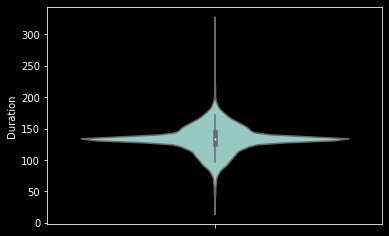

In [22]:
# viewing the distribution of the duration in the dataframe
sns.violinplot(y=df['Duration'])
plt.show()

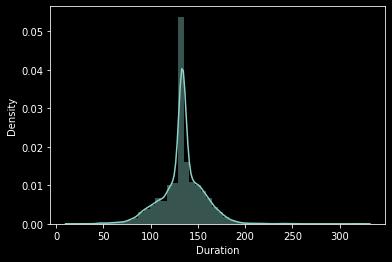

In [23]:
# viewing the distribution of the duration in the dataframe
sns.distplot(df['Duration'])
plt.show()

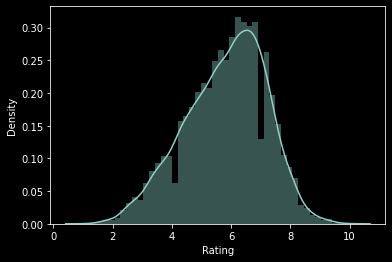

In [24]:
# viewing the distribution of the rating in the dataframe
sns.distplot(df['Rating'])
plt.show()

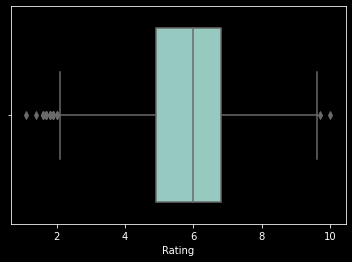

In [25]:
# viewing the distribution of the rating in the dataframe
sns.boxplot(x=df['Rating'])
plt.show()

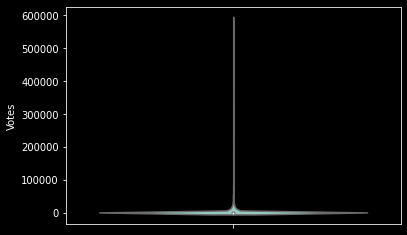

In [26]:
# viewing the distribution of the votes in the dataframe
sns.violinplot(y=df["Votes"])
plt.show()

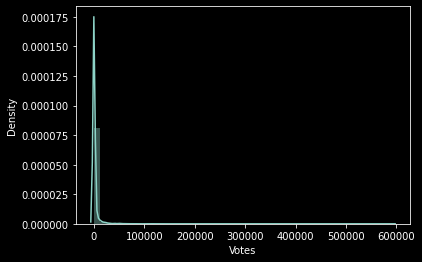

In [27]:
# viewing the distribution of the votes in the dataframe
sns.distplot(df['Votes'])
plt.show()

In [28]:
# viewing the movies which have more than 100000 votes
df[df['Votes']>100000]

,index,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
48,75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
1694,3410,Dangal,2016,161.0,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
1900,3829,Dil Bechara,2020,101.0,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid
2436,4848,Gandhi,1982,191.0,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
4020,8035,Lagaan: Once Upon a Time in India,2001,224.0,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
4105,8219,Life of Pi,2012,127.0,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
4109,8228,Like Stars on Earth,2007,165.0,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
4111,8233,Lion,2016,118.0,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
4843,9764,My Name Is Khan,2010,165.0,Drama,8.0,101014,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon
5370,10882,PK,2014,153.0,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt


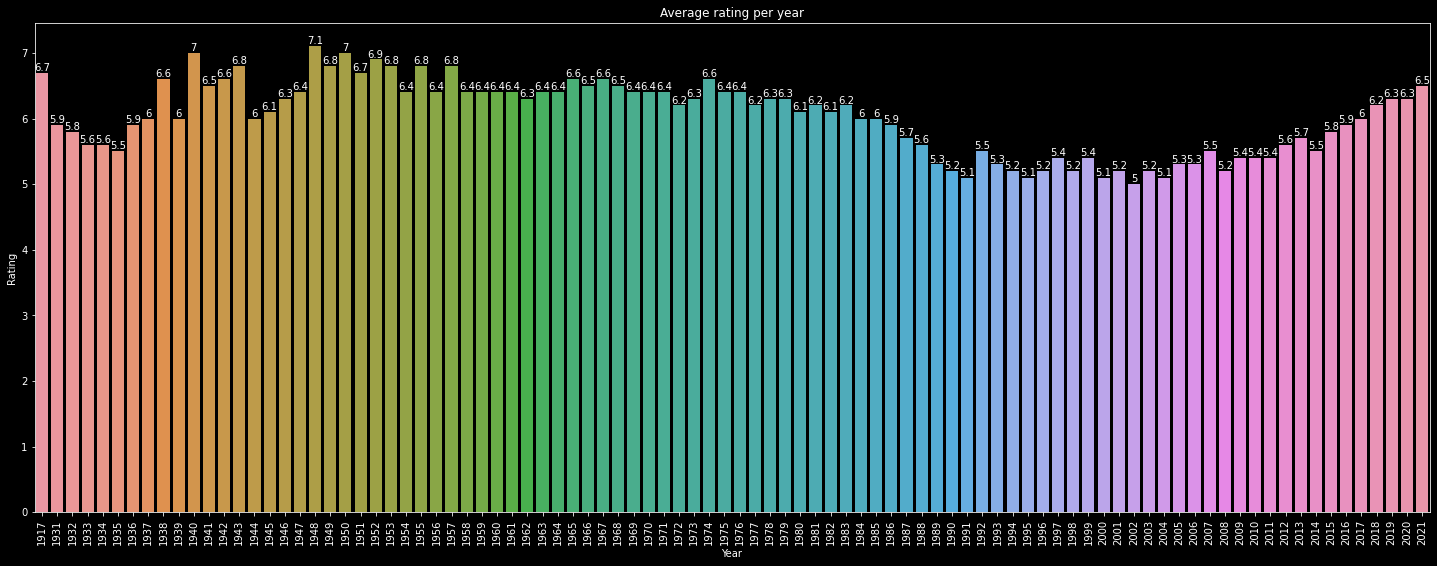

In [29]:
# Distribution of Average ratings of the movies in a particular year
year_rating=df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',ascending=False)
year_rating['Rating']=round(year_rating['Rating'],1)
plt.figure(figsize=(25,9))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()


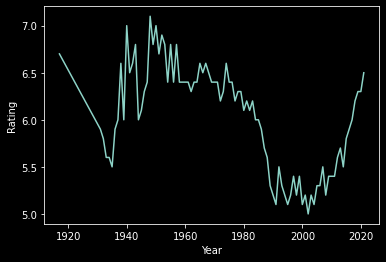

In [30]:
# Visualisation of Rating trend of the movies with time
sns.lineplot(x='Year',y="Rating",data=year_rating)
plt.show()

In [31]:
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
year_count

,Year,count
0,2019,238
1,2017,223
2,2018,214
3,2015,188
4,2016,184
...,...,...
87,1939,4
88,1931,3
89,1934,2
90,1932,2


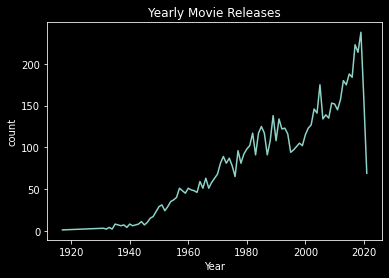

<Figure size 7200x1440 with 0 Axes>

In [32]:
sns.lineplot(x='Year',y='count',data=year_count)
plt.title("Yearly Movie Releases")
plt.figure(figsize=(100,20))
plt.show()

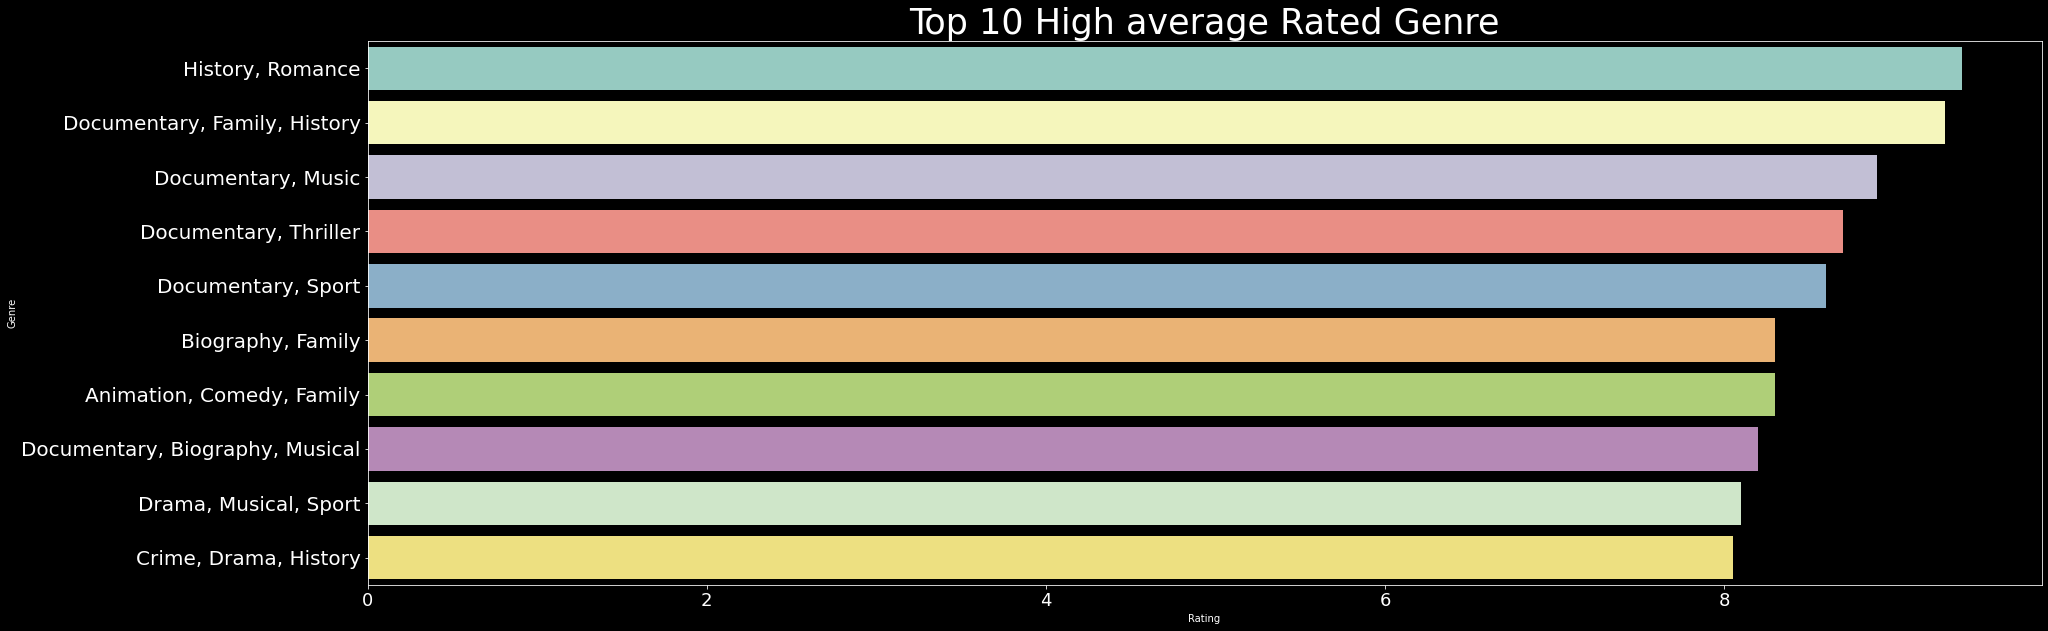

In [33]:
genre_rate=df.groupby("Genre").agg({'Rating':'mean'}).sort_values(by='Rating',ascending=False).reset_index().head(10)
plt.figure(figsize=(30,10))
sns.barplot(x="Rating",y="Genre",data=genre_rate)
plt.yticks(size=20)
plt.xticks(size=18)
plt.title("Top 10 High average Rated Genre",size=35)
plt.show()

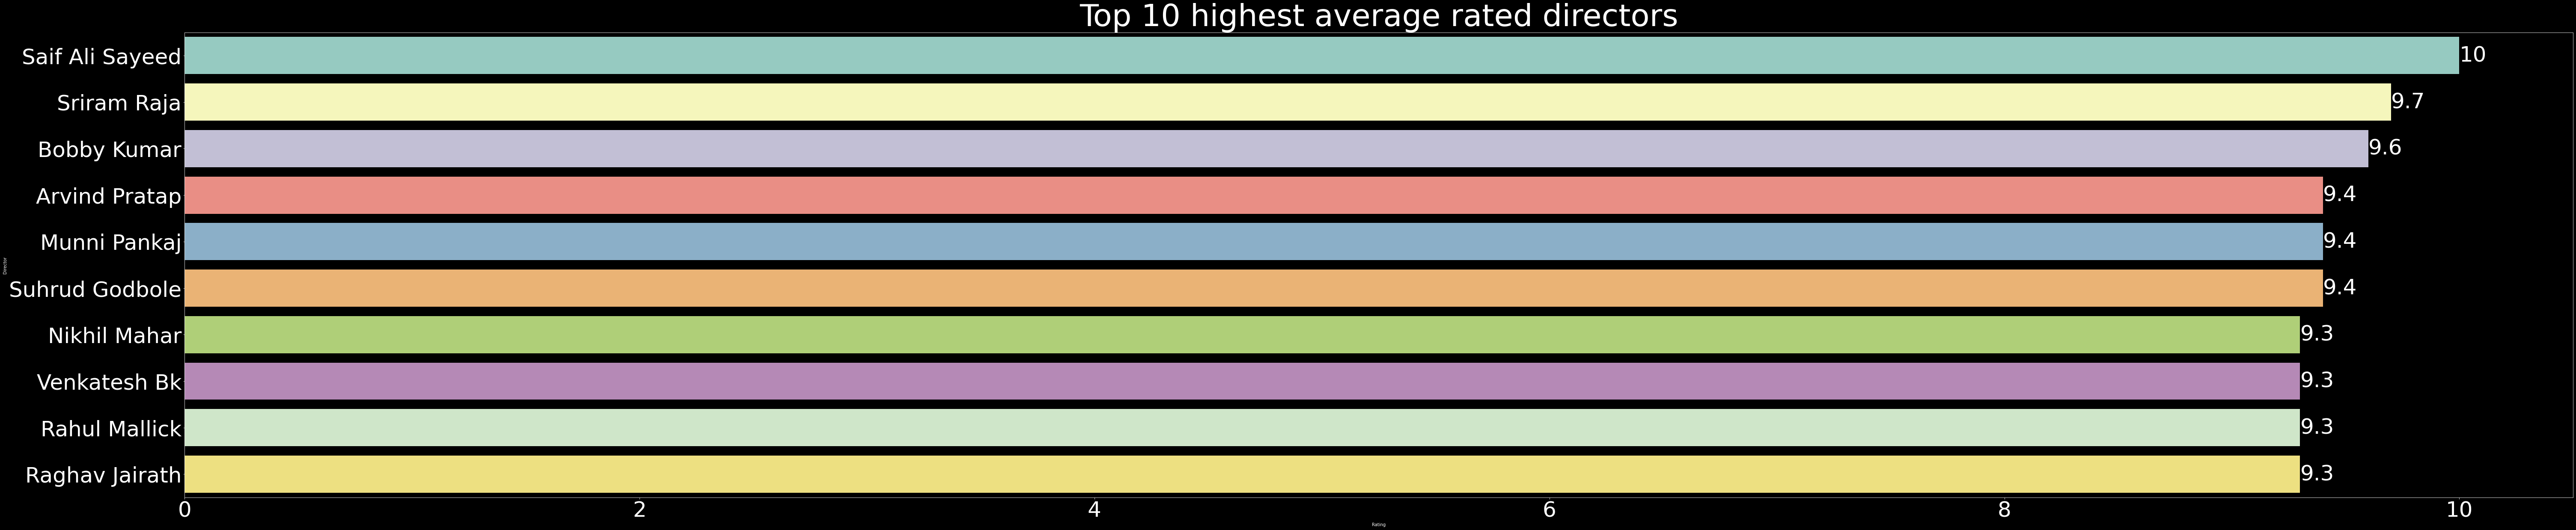

In [34]:
director_rating=df.groupby("Director").agg({'Rating':'mean'}).sort_values(by='Rating',ascending=False).reset_index().head(10)
director_rating
plt.figure(figsize=(100,20))
plt.title("Top 10 highest average rated directors",size=72)
ax=sns.barplot(x='Rating',y='Director',data=director_rating)
ax.bar_label(ax.containers[0],size=50)
plt.yticks(size=50)
plt.xticks(size=50)
plt.show()

In [35]:
# Making a different dataset for predicting the Ratings so that we don't lose our original cleaned data

In [36]:
df_update=df.drop('Name',axis=1)
df_update

,index,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,1,2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,3,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,5,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,6,2005,142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,8,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
7553,15501,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7554,15503,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7555,15504,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7556,15505,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [37]:
df_update.drop('index',axis=1,inplace=True)

In [38]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 0 to 7557
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   int32  
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int32  
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(5)
memory usage: 531.4+ KB


In [39]:
# Encoding our data for better buildimg of the model

In [40]:
actor1_encoded=df_update.groupby('Actor 1').agg({'Rating':'mean'}).to_dict()
actor2_encoded=df_update.groupby('Actor 2').agg({'Rating':'mean'}).to_dict()
actor3_encoded=df_update.groupby('Actor 3').agg({'Rating':'mean'}).to_dict()
director_encoded=df_update.groupby('Director').agg({'Rating':'mean'}).to_dict()
genre_encoded=df_update.groupby('Genre').agg({'Rating':'mean'}).to_dict()

In [41]:
df_update['actor1_encoded']=round(df_update['Actor 1'].map(actor1_encoded['Rating'],1))
df_update['actor2_encoded']=round(df_update['Actor 2'].map(actor2_encoded['Rating'],1))
df_update['actor3_encoded']=round(df_update['Actor 3'].map(actor3_encoded['Rating'],1))
df_update['director_encoded']=round(df_update['Director'].map(director_encoded['Rating'],1))
df_update['genre_encoded']=round(df_update['Genre'].map(genre_encoded['Rating'],1))

In [42]:
df_update

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,2019,109.000000,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.0,7.0,7.0,7.0,6.0
1,2019,110.000000,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.0,4.0,4.0,4.0,6.0
2,1997,147.000000,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.0,6.0,6.0,5.0,6.0
3,2005,142.000000,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.0,6.0,6.0,8.0,7.0
4,2012,82.000000,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,6.0,6.0,6.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7553,1992,133.439124,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda,6.0,6.0,5.0,6.0,6.0
7554,1989,125.000000,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.0,6.0,6.0,6.0,6.0
7555,1988,133.439124,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,6.0,4.0,5.0,4.0,5.0
7556,1999,129.000000,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.0,5.0,6.0,5.0,5.0


In [43]:
df_update.drop(['Actor 1','Actor 2','Actor 3','Director','Genre'],axis=1,inplace=True)

In [44]:
df_update

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,2019,109.000000,7.0,8,7.0,7.0,7.0,7.0,6.0
1,2019,110.000000,4.4,35,5.0,4.0,4.0,4.0,6.0
2,1997,147.000000,4.7,827,5.0,6.0,6.0,5.0,6.0
3,2005,142.000000,7.4,1086,5.0,6.0,6.0,8.0,7.0
4,2012,82.000000,5.6,326,6.0,6.0,6.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...
7553,1992,133.439124,5.3,135,6.0,6.0,5.0,6.0,6.0
7554,1989,125.000000,5.8,44,6.0,6.0,6.0,6.0,6.0
7555,1988,133.439124,4.6,11,6.0,4.0,5.0,4.0,5.0
7556,1999,129.000000,4.5,655,5.0,5.0,6.0,5.0,5.0


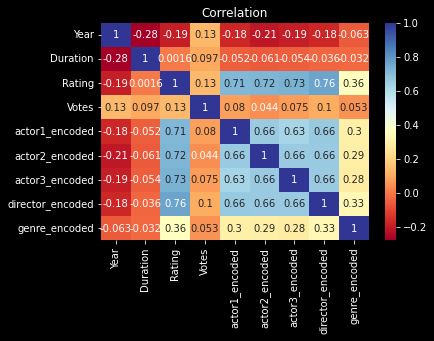

In [45]:
# Lets see if there is any Correlation in the data
sns.heatmap(df_update.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [46]:
X=df_update.drop('Rating',axis=1)
Y=df_update['Rating']
X.head(5)


,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,2019,109.0,8,7.0,7.0,7.0,7.0,6.0
1,2019,110.0,35,5.0,4.0,4.0,4.0,6.0
2,1997,147.0,827,5.0,6.0,6.0,5.0,6.0
3,2005,142.0,1086,5.0,6.0,6.0,8.0,7.0
4,2012,82.0,326,6.0,6.0,6.0,6.0,5.0


In [47]:
# splitting the data for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=42)

In [48]:
print("Shape of training Data ",X_train.shape)
print("Shape of training target ",Y_train.shape)
print("Shape of testing Data ",X_test.shape)
print("Shape of testing target ",Y_test.shape)

Shape of training Data  (6046, 8)
Shape of training target  (6046,)
Shape of testing Data  (1512, 8)
Shape of testing target  (1512,)


In [49]:
# Building a linear regression model
LR=LinearRegression()
LR.fit(X_train,Y_train)
print("Coefficient of determination",LR.score(X_train,Y_train))

Coefficient of determination 0.734352285906029


In [50]:
y_pred_LR=LR.predict(X_test)
print('R^2: ', r2_score(Y_test, y_pred_LR))
print('MAE: ',mean_absolute_error(Y_test, y_pred_LR))
print('MSE: ', mean_squared_error(Y_test, y_pred_LR))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, y_pred_LR)))

R^2:  0.7366611591833336
MAE:  0.5326217085079347
MSE:  0.48792405025969754
RMSE:  0.6985156048791591


In [51]:
results = pd.DataFrame({'actual': Y_test,
                        'predicted': y_pred_LR.ravel(),
                        'residual': Y_test - y_pred_LR}
                      )
results.head()

,actual,predicted,residual
3148,7.4,6.636475,0.763525
1662,4.9,5.644785,-0.744785
3078,6.5,6.076610,0.423390
3012,5.7,5.940662,-0.240662
3332,7.0,6.907449,0.092551


In [52]:
y_pred_LR = LR.predict(X_test)

print('R^2: ', r2_score(Y_test, y_pred_LR))
print('MAE: ',mean_absolute_error(Y_test, y_pred_LR))
print('MSE: ', mean_squared_error(Y_test, y_pred_LR))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, y_pred_LR)))

R^2:  0.7366611591833336
MAE:  0.5326217085079347
MSE:  0.48792405025969754
RMSE:  0.6985156048791591


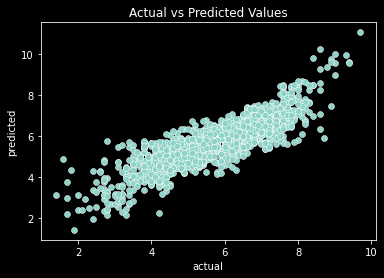

In [53]:
plt.title("Actual vs Predicted Values")
sns.scatterplot(x=results['actual'],y=results['predicted'],data=results)
plt.show()

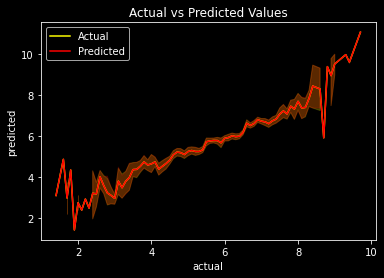

In [63]:
plt.title("Actual vs Predicted Values")
sns.lineplot(x=results['actual'], y=results['predicted'], data=results, color='yellow',alpha=1, label='Actual')
sns.lineplot(x=results['actual'], y=results['predicted'], data=results, color='red', label='Predicted')
plt.show()